In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
from tensorflow.keras import datasets, layers, models
import pyttsx3                                    
import datetime                                   
import speech_recognition as sr                    
import wikipedia                                  
import webbrowser                                 
import random                                     
import os                                                                             
import subprocess as sp
import time

2.9.1


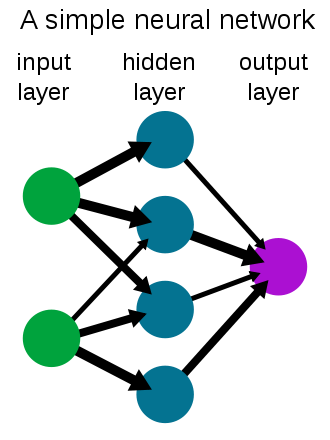

In [2]:
#Load Data set fashion_mnist
fashion_mnist = tf.keras.datasets.fashion_mnist
print(fashion_mnist)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images[0])
print(test_images[0])

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0  

### <font color = green > * The train_images and train_labels arrays are the training set—the data the model uses to learn.<br></font>
### <font color = green > * The model is tested against the test set, the test_images, and test_labels arrays. </font><br>
### <font color = green > * The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. </font><br>
### <font color = green > * The labels are an array of integers, ranging from 0 to 9. </font><br>
### <font color = green > * These correspond to the class of clothing the image represents:</font>

## <font color = red > labels to output integers
<font color = green >* 0	T-shirt/top
<font color = green ><br> * 1	Trouser
<font color = green ><br>* 2	Pullover
<font color = green ><br>* 3	Dress
<font color = green ><br>* 4	Coat
<font color = green ><br>* 5	Sandal
<font color = green ><br>* 6	Shirt
<font color = green ><br>* 7	Sneaker
<font color = green ><br>* 8	Bag
<font color = green ><br>* 9	Ankle boot

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
print(train_labels.shape)
train_labels

(60000,)


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

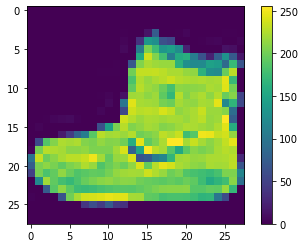

In [7]:
# Preprocess the data
#The data must be preprocessed before training the network. If you inspect the first image in the training set, 
#you will see that the pixel values fall in the range of 0 to 255:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
#Scale these values to a range of 0 to 1 before feeding them to the neural network model. 
#To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed 
#in the same way:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
# To verify that the data is in the correct format and that you're ready to build and train the network, 
# let's display the first 25 images from the training set and display the class name below each image.

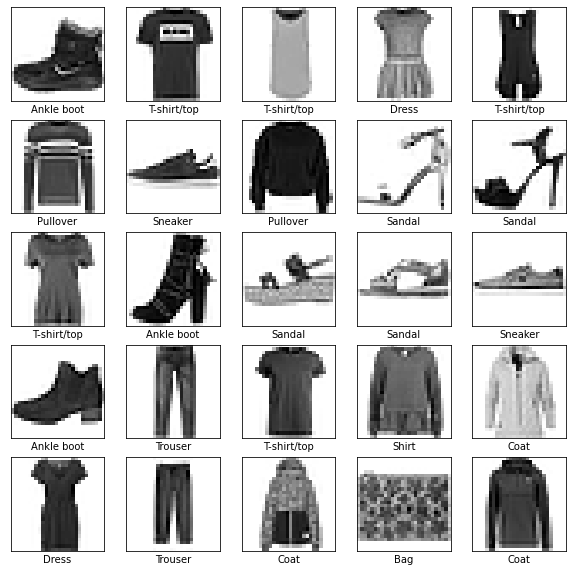

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)  # color map
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## <font color = red > Build the model
### <font color = green > Building the neural network requires configuring the layers of the model, then compiling the model.</font>

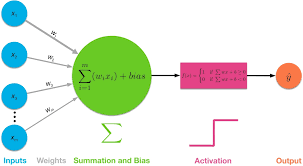

### <font color = green >  Types of activation functions
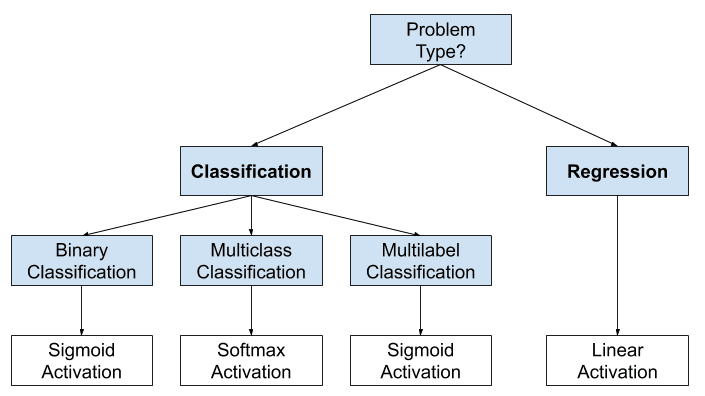
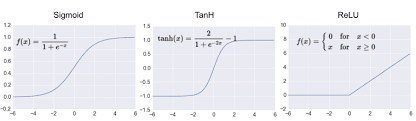

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

<font color = green > * The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data

<font color = green > * After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

## <font color = red > Compile the model
<font color = green > * Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

<font color = green > * Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.<br>
<font color = green > * Optimizer —This is how the model is updated based on the data it sees and its loss function.<br>
<font color = green > * Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

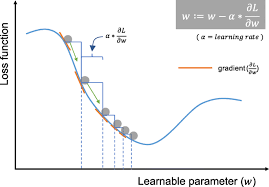

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## <font color = red> Train the model
<font color = green > * Training the neural network model requires the following steps:
<font color = green ><br> * Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
<font color = green ><br>* The model learns to associate images and labels.
<font color = green ><br>* You ask the model to make predictions about a test set—in this example, the test_images array.
<font color = green ><br>* Verify that the predictions match the labels from the test_labels array.

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5029 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3770 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3389 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3138 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2951 - accuracy: 0.8933
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2817 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2703 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2574 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2486 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.24

## <font color = red ><br> Evaluate accuracy
<font color = green >* Next, compare how the model performs on the test dataset:

In [14]:
arrr = []
arrr = model.evaluate(test_images,  test_labels, verbose=2)


313/313 - 1s - loss: 0.3359 - accuracy: 0.8835 - 1s/epoch - 4ms/step


## <font color = red ><br> Making predictions
<font color = green >* With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—digits—to probabilities, which should be easier to interpret.

In [15]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [16]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [17]:
y_pred_labels = [np.argmax(i) for i in predictions]
y_pred_labels

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 5,
 3,
 4,
 1,
 2,
 2,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 2,
 6,
 0,
 9,
 4,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 0,
 1,
 6,
 7,
 6,
 7,
 2,
 1,
 2,
 6,
 4,
 2,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 2,
 4,
 7,
 8,
 7,
 0,
 2,
 6,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 2,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 2,
 2,
 3,
 6,
 7,
 6,
 7,
 8,
 5,
 7,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 6,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 6,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 4,
 2,
 1,
 2,
 5,
 1,
 0,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 3,
 2,
 1,
 3,
 5,
 0,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 6,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 3,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 6,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 4,
 0,
 7,
 7,
 6,
 2,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 2,
 5,
 6,
 9,
 2,
 2,
 8,
 6,
 2,
 2,
 2,


In [18]:
engine = pyttsx3.init()                           
voices = engine.getProperty('voices')             
engine.setProperty('voice',voices[1].id)

def speak(audio):
    engine.say(audio)
    engine.runAndWait()

In [19]:
speak('Now enter your prediction input ')
i = (int)(input('Enter which indexed images prediction you want to check : '))
predictions[i]

Enter which indexed images prediction you want to check : 3


array([7.54360752e-09, 9.99998808e-01, 1.24475855e-11, 1.14602415e-06,
       2.13754681e-09, 9.95859038e-12, 2.95300340e-09, 1.98745587e-20,
       4.41178561e-13, 9.34442092e-20], dtype=float32)

In [20]:
pred = np.argmax(predictions[i])  #get a class
pred

1

In [21]:
test_labels[i]  # test level is also 9 [correct match ]

1

In [22]:
speak("our prediction is ")
speak(class_names[pred])
print("our prediction is : " , class_names[pred])

our prediction is :  Trouser


In [23]:
speak("Now let's check whether our prediction is correct or not")
if pred == test_labels[i] :
    time.sleep(1)
    speak("hurray , our prediction is correct")
else:
    speak("sorry our prediction is wrong")

In [24]:
speak("Now lets visualize model using graphs")

## <font color = red > Visualisation 

In [25]:
# Plot Function
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


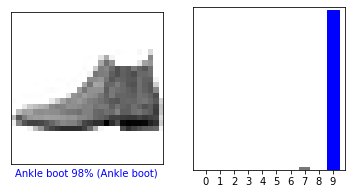

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

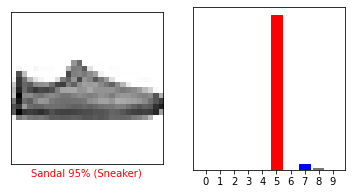

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

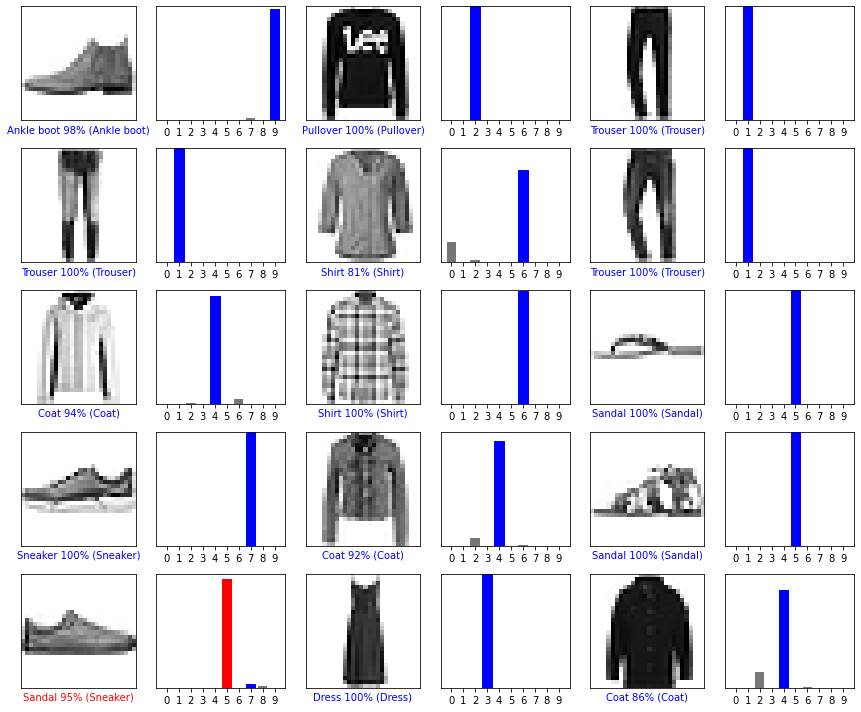

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# <font color = 'purple'> Prediction by CNN </font>

In [29]:
speak("Now let's do the same prediction using C,N,N")

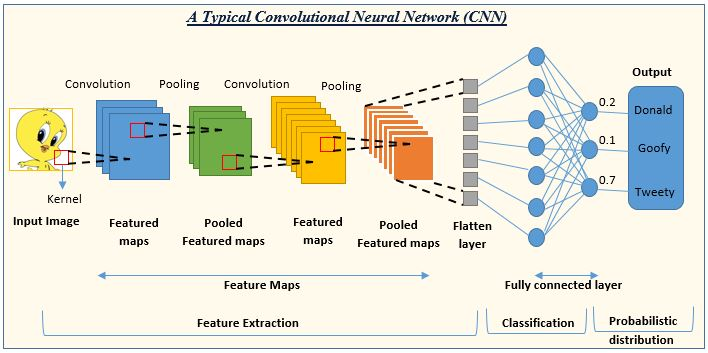
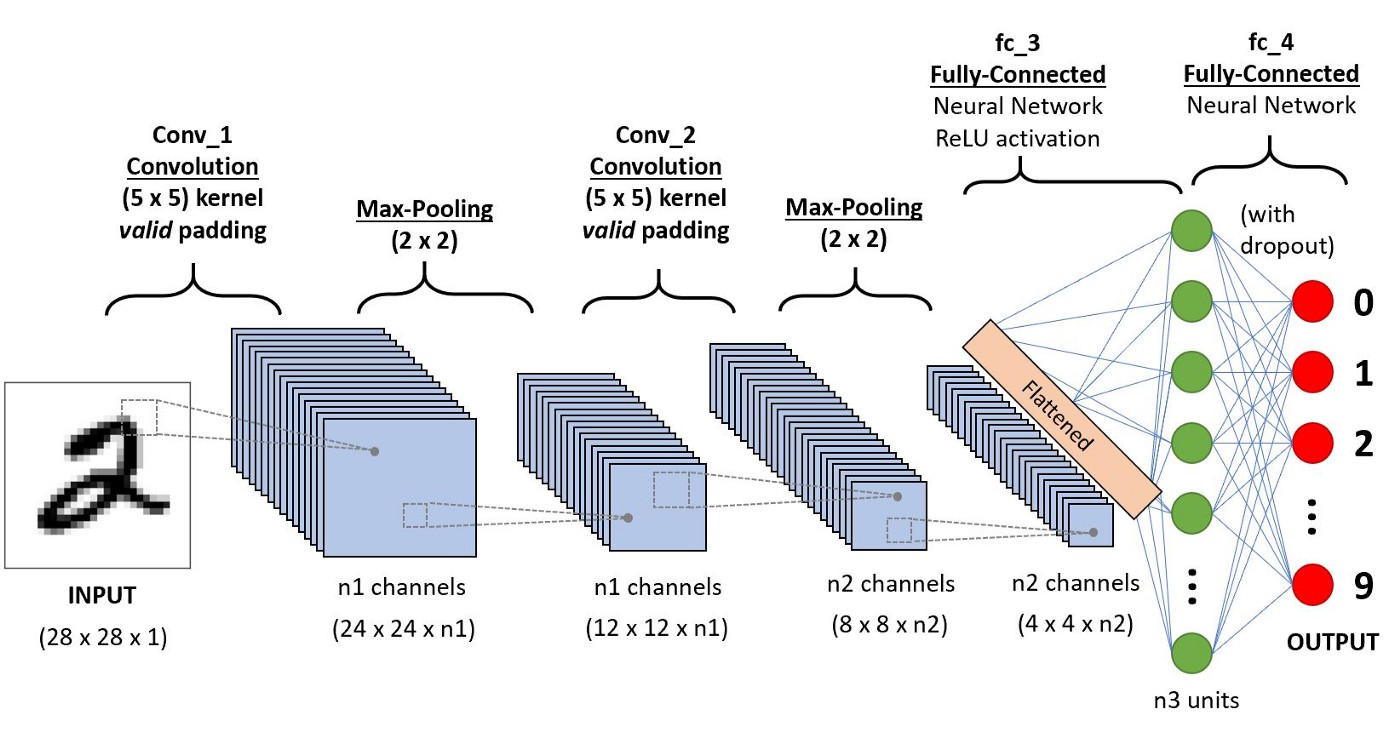

In [30]:
train_images = train_images.reshape((train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))
test_images = test_images.reshape(test_images.shape[0],test_images.shape[1],test_images.shape[2],1)
#checking the shape after reshaping
print(train_images.shape)
print(test_images.shape)
#normalizing the pixel values
train_images=train_images/255
test_images=test_images/255

(60000, 28, 28, 1)
(10000, 28, 28, 1)


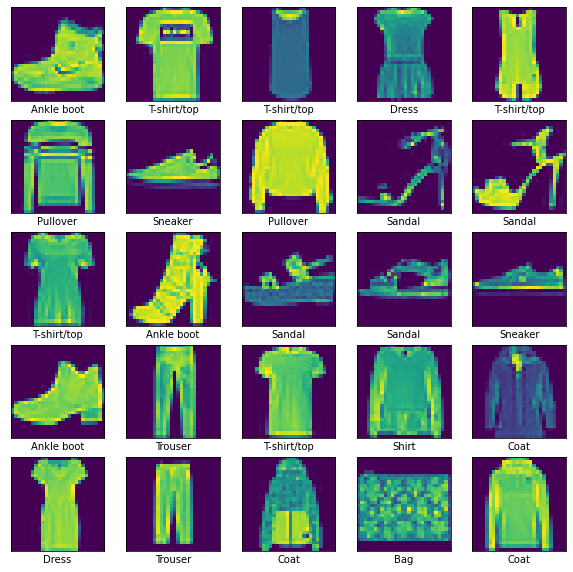

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i] ,)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

<font color = green > <br>The padding plays a vital role in creating CNN. After the convolution operation, the original size of the image is shrunk. Also, in the image classification task, there are multiple convolution layers after which our original image is shrunk after every step, which we don’t want. 
<font color = green > <br> Secondly, when the kernel moves over the original image, it passes through the middle layer more times than the edge layers, due to which there occurs an overlap.
<font color = green > <br> To overcome this problem, a new concept was introduced named padding. It is an additional layer that can add to the borders of an image while preserving the size of the original picture

## <font color = red > Build the model
### <font color = green > Building the neural network requires configuring the layers of the model, then compiling the model.</font>

In [32]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [34]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

## <font color = red > Compiling and Traning the model

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 1.0548 - accuracy: 0.6003 - val_loss: 0.7909 - val_accuracy: 0.7150
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.7255 - accuracy: 0.7259 - val_loss: 0.7041 - val_accuracy: 0.7350
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.6547 - accuracy: 0.7553 - val_loss: 0.6420 - val_accuracy: 0.7628
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.5965 - accuracy: 0.7769 - val_loss: 0.6165 - val_accuracy: 0.7687
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.5502 - accuracy: 0.7959 - val_loss: 0.5558 - val_accuracy: 0.7930
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.5185 - accuracy: 0.8074 - val_loss: 0.5284 - val_accuracy: 0.8016
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4917 - accuracy: 0.8174 - val_loss: 0.5287 -

## <font color = red ><br> Evaluate accuracy
<font color = green >* Next, compare how the model performs on the test dataset:

In [37]:
arr = []
arr = model.evaluate(test_images , test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.4531 - accuracy: 0.8343


## <font color = red ><br> Making predictions


In [38]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

y_pred_labels = [np.argmax(i) for i in predictions]
y_pred_labels

313/313 [==============================] - 3s 8ms/step


[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 7,
 3,
 4,
 1,
 2,
 8,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 6,
 6,
 3,
 9,
 3,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 0,
 1,
 3,
 7,
 6,
 7,
 2,
 1,
 2,
 6,
 2,
 2,
 5,
 8,
 2,
 2,
 8,
 6,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 3,
 3,
 7,
 8,
 7,
 0,
 2,
 6,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 2,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 4,
 2,
 3,
 6,
 7,
 3,
 7,
 8,
 5,
 7,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 4,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 4,
 2,
 1,
 2,
 5,
 1,
 0,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 2,
 1,
 1,
 6,
 5,
 0,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 6,
 7,
 4,
 2,
 0,
 5,
 4,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 8,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 1,
 6,
 3,
 2,
 8,
 3,
 2,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 2,
 0,
 7,
 7,
 6,
 2,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 2,
 5,
 6,
 9,
 2,
 2,
 8,
 6,
 4,
 2,
 4,


In [ ]:
speak('Now enter your prediction input ')
i = (int)(input('Enter which indexed images prediction you want to check : '))
predictions[i]

pred = np.argmax(predictions[i])  #get a class
pred


In [ ]:
speak("our prediction is ")
speak(class_names[pred])
print("our prediction is : " , class_names[pred])

speak("Now , let's check whether our prediction is correct or not")
if pred == test_labels[i] :
    time.sleep(1)
    speak("hurray , our prediction is correct")
else:
    speak("sorry our prediction is wrong")

In [ ]:
speak("Now lets visualize model using graphs")

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# <font color = purple>Comparing the neural networks

In [ ]:
speak("Now , let's compare A,N,N , and , C,N,N model ")
time.sleep(1)
speak("By comparing accuracy , i founded that , ")
if arr[0] < arrr[0] and arr[1] > arrr[1]:
    speak(" C,N,N predicts better than A,N,N ")
else:
    speak(" A,N,N   predicts  better than  C,N,N")